In [1]:
import h5py
import sys
from scipy import constants as sp
import os

sys.path.append('..')

from system import *
from fields import *

Load IGRF coefficients ...


In [2]:
e_field = zero_field()
b_field = t89(7)
s = System(e_field, b_field)

In [3]:
s.populate_by_eq_pa(10,
                    delta(10),
                    delta(1e6),
                    uniform(np.radians(0), np.radians(90)),
                    uniform(0, 2 * np.pi)
                   )

100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


In [4]:
s.solve(0.1, 1e-4, 1e-4)

100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


In [5]:
s.write('../simulations/test')

../simulations/test already exists. Overwrite? (Y/N)Y
Saved file ../simulations/test.hdf5 containing 1.49 megabytes of information.


In [3]:
s.load('../simulations/test')

Loaded file ../simulations/test.hdf5 containing 762.81 kilobytes of information.


In [7]:
s.add_particles(100,
                delta(10),
                delta(1e6),
                uniform(np.radians(20), np.radians(60)),
                uniform(0, 2 * np.pi),
                by_eq_pa=True
                )

100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


In [8]:
s.add_time(1)

100%|██████████| 210/210 [00:23<00:00,  9.00it/s]


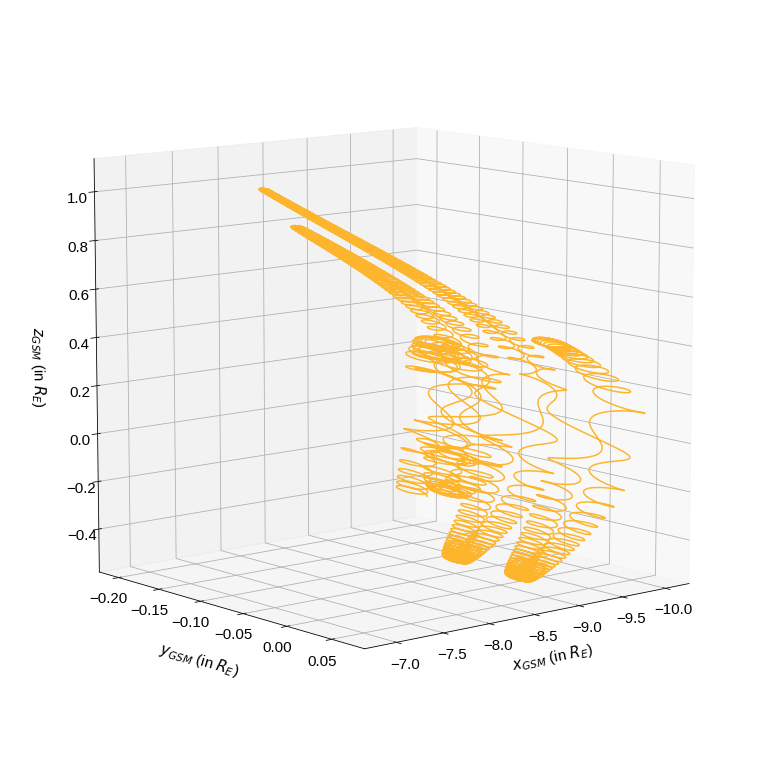

In [12]:
f = h5py.File('../simulations/test.hdf5', 'r')

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'Liberation Sans'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

col = plt.cm.plasma(np.linspace(0, 1.0, 250))

for p, i in enumerate([209]):
    pos = f['data']['history'][i, :, 0]
    ax.plot(pos[:, 0] / Re, pos[:, 1] / Re, pos[:, 2] / Re, color=col[i])

ax.set_xlabel('\n$x_{GSM}$ (in $R_E$)', linespacing=1.5)
ax.set_ylabel('\n$y_{GSM}$ (in $R_E$)', linespacing=3)
ax.set_zlabel('\n$z_{GSM}$ (in $R_E$)', linespacing=3)

ax.view_init(10, 50)

plt.grid()
plt.tight_layout(pad=-1)
plt.show()

f.close()

system.System